# **DECISION TREE**

**Branching Into Intelligence: Decision Tree on Social Network Ads Dataset**

In this project, we will build a Decision Tree Classification model using the Social Network Ads dataset to predict whether a user will purchase a product based on their age, gender, and estimated salary. We will explore the data to understand patterns, prepare it for modeling, train a decision tree, and evaluate its performance using metrics like accuracy and confusion matrix. Finally, we will interpret the model’s decisions to understand which features influence purchasing behavior the most. This project helps us learn how decision trees work and how they can be used for real-world classification problems.

Import Libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree

Load Dataset

In [3]:
data=pd.read_csv('/content/drive/MyDrive/data/Social_Network_Ads.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Checking Missing Values and duplicates

In [5]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [6]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
395,False
396,False
397,False
398,False


Show first 30 Data

In [7]:
data.head(30)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Encode Categorical Columns

In [8]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])


Feature Selection

In [9]:
x=data[['Age','Gender','EstimatedSalary']]
y=data["Purchased"]

Train Test Split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)


Build and Train Decision Tree

In [11]:
model=DecisionTreeClassifier(max_depth=4,random_state=42,criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Prediction

In [12]:
y_pred=model.predict(x_test)

Evaluation

In [13]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy: 0.9125
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



Confusion Matrix

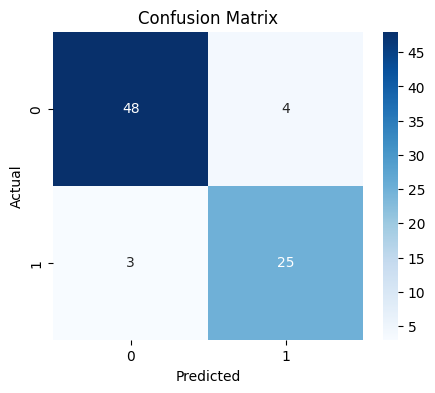

In [14]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Visualize the Decision Tree

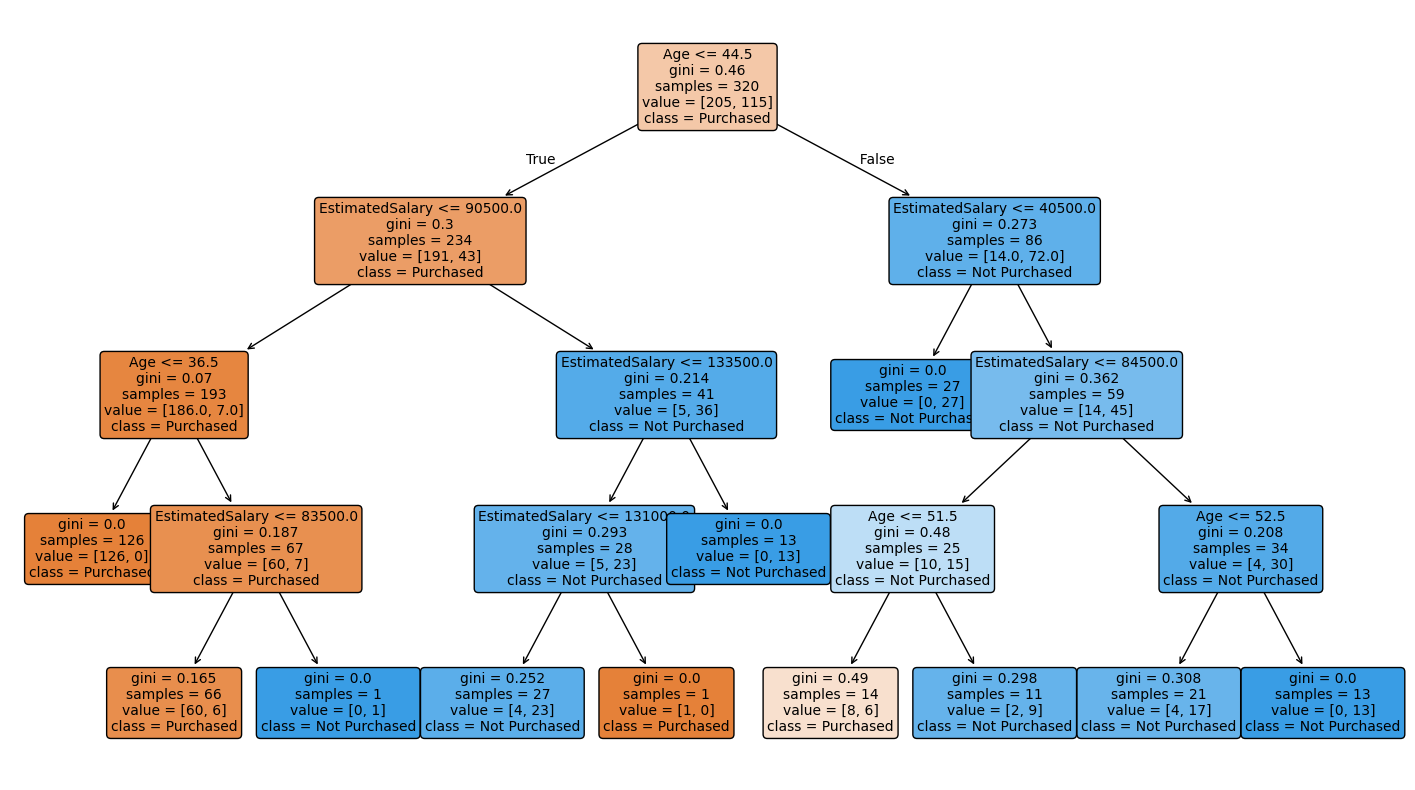

In [15]:
plt.figure(figsize=(18,10))
tree.plot_tree(model,feature_names=x.columns,class_names=["Purchased","Not Purchased"],filled=True,rounded=True,fontsize=10)
plt.show()

GridSearchCV for Best Parameters

In [16]:
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":[2,3,4,5,6,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

grid=GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),#The model you want to tune → Decision Tree
    param_grid=param_grid, #All combinations of hyperparameters to test
    cv=5,                  #-fold cross-validation
                           #The model will train on 5 different splits and compute accuracy
    scoring="accuracy",    #GridSearch will pick parameters that give best accuracy
    n_jobs=-1              #Use all CPU cores for faster searching
)
grid.fit(x_train,y_train)

print("\nBest Parameters:",grid.best_params_)  #best_params_ → Shows best settings
best_model=grid.best_estimator_                #best_estimator_ → Ready-to-use tuned model



Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


Evaluate Best Model

In [17]:
best_pred = best_model.predict(x_test)
print("\nTuned Model Accuracy:", accuracy_score(y_test, best_pred))
print("Tuned Classification Report:\n", classification_report(y_test, best_pred))



Tuned Model Accuracy: 0.9
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.86      0.86      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



ROC Curve

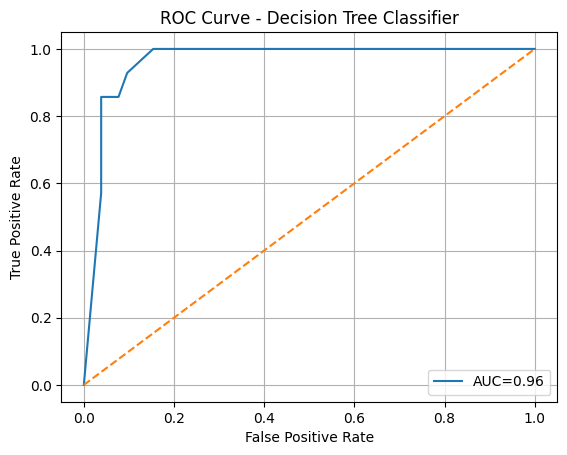

In [26]:
y_prob=best_model.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend()
plt.grid(True)
plt.show()

In this project, “Branching Into Intelligence: A Decision Tree ML Project,” we built a Decision Tree classifier using the Social Network Ads Dataset to predict whether a user would purchase a product based on their age, gender, and estimated salary. After preprocessing the data and training the model, we evaluated its performance using accuracy and classification metrics.

The model achieved an accuracy of 91%, with both precision and recall for the “buyer” class (1) at 0.86. This indicates that the model is able to correctly identify a high percentage of actual buyers (good recall) while also ensuring that most predicted buyers are indeed true buyers (good precision). This balance makes the model practical for real-world marketing tasks—helping reduce unnecessary ad spending while still capturing a majority of potential customers.

Even after applying hyperparameter tuning with GridSearchCV, the performance remained consistently strong, showing that the model generalizes well and that the Decision Tree structure effectively captures the relationships in the dataset.

Overall, this project demonstrates how Decision Tree models can be used for customer purchasing prediction and how such models support data-driven marketing decisions by identifying the factors that most influence user buying behavior.